In [3]:
%reset -f
import tensorflow as tf
print('TF version:' + tf.__version__)

TF version:1.1.0


In [72]:
import tensorflow as tf
%autocall
import numpy as np

# Create TensorFlow object called tensor
hello_constant = tf.constant('Hello World!')

with tf.Session() as sess:
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

Automatic calling is: OFF
b'Hello World!'


In [5]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


In [40]:
x = tf.placeholder(tf.string)

with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Hello Shmulik'})
    print(output)

Hello Shmulik


In [9]:
x = tf.placeholder(tf.string)
y = tf.placeholder(tf.int32)
z = tf.placeholder(tf.float32)

with tf.Session() as sess:
    output = sess.run(y, feed_dict={x: 'Test String', y: 123, z: 45.67})
    print(output)

123


In [18]:
print (run())
def run():
    output = None
    x = tf.placeholder(tf.int32)

    with tf.Session() as sess:
        # TODO: Feed the x tensor 123
        output = sess.run(x, feed_dict={x: 123})

    return output


123


In [56]:
# TODO: Convert the following to TensorFlow:
x = tf.constant(10)
y = tf.constant(2)
t = tf.constant(1)
z = tf.subtract(tf.divide(x,y), tf.cast(t,tf.float64))
a = tf.cast(t,tf.int32)
b = tf.divide(y,a)
print("a:",a, "y:" ,y, "b:" ,b)
new = tf.add(y,tf.cast(b, tf.int32))

with tf.Session() as sess:
    output = sess.run(z)
    output_new = sess.run(new)
    print (output)

# TODO: Print z from a session

a: Tensor("Const_63:0", shape=(), dtype=int32) y: Tensor("Const_62:0", shape=(), dtype=int32) b: Tensor("truediv_27:0", shape=(), dtype=float64)
4.0


In [11]:
a = tf.constant([1, 2, 3, 4, 5, 6], shape=[2, 3])
b = tf.constant([7, 8, 9, 10, 11, 12], shape=[3, 2])
c = tf.matmul(a, b) 
print (c)

d = tf.constant(np.arange(1, 13, dtype=np.int32),shape=[2, 2, 3])   

Tensor("MatMul_8:0", shape=(2, 2), dtype=int32)


In [2]:
#Mini-batch

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np

save_file = './train_model.ckpt'

def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    outout_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
        
    return outout_batches

learning_rate = 0.001
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# TODO: Set batch size
batch_size = 128
assert batch_size is not None, 'You must set the batch size'

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    
    # TODO: Train optimizer on all batches
    for batch_features, batch_labels in batches(batch_size, train_features, train_labels):
        sess.run(optimizer, feed_dict={features: batch_features, labels: batch_labels})

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, labels: test_labels})

    print('Test Accuracy: {}'.format(test_accuracy))

    # Save the model
    saver.save(sess, save_file)
    print('Trained Model Saved.')


Extracting /datasets/ud730/mnist\train-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist\train-labels-idx1-ubyte.gz
Extracting /datasets/ud730/mnist\t10k-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist\t10k-labels-idx1-ubyte.gz
Test Accuracy: 0.12630000710487366
Trained Model Saved.


In [79]:
import tensorflow as tf


def run():
    output = None
    logit_data = np.array([[1, 2, 3, 6],[2, 4, 5, 6], [3, 8, 7, 6]])
    logits = tf.placeholder(tf.float32)
  
    softmax = tf.nn.softmax(logits)
    #softmax = exp(logits) / reduce_sum(exp(logits), dim) 

    with tf.Session() as sess:
        output = sess.run(softmax, feed_dict={logits: logit_data})


    return output
run()

array([[ 0.00626879,  0.01704033,  0.04632042,  0.93037045],
       [ 0.01203764,  0.08894681,  0.24178252,  0.657233  ],
       [ 0.00446236,  0.66227239,  0.2436364 ,  0.08962882]], dtype=float32)

In [2]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf

softmax_data = [0.7, 0.2, 0.1]
one_hot_data = [1.0, 0.0, 0.0]

softmax = tf.placeholder(tf.float32)
one_hot = tf.placeholder(tf.float32)


cross_entropy = -tf.reduce_sum(tf.multiply(one_hot, tf.log(softmax)))

with tf.Session() as sess:
    print(sess.run(cross_entropy, feed_dict={softmax: softmax_data, one_hot: one_hot_data}))


0.356675


In [88]:
from pprint import pprint

import math
def batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    # TODO: Implement batching
    output_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        output_batches.append(batch)
        #print ("start_i: ", start_i, " end_i: ", end_i)
        
    return output_batches


# 4 Samples of features
example_features = [
    ['F11','F12','F13','F14'],
    ['F21','F22','F23','F24'],
    ['F31','F32','F33','F34'],
    ['F41','F42','F43','F44']]
# 4 Samples of labels
example_labels = [
    ['L11','L12'],
    ['L21','L22'],
    ['L31','L32'],
    ['L41','L42']]

# PPrint prints data structures like 2d arrays, so they are easier to read
pprint(batches(3, example_features, example_labels))


start_i:  0  end_i:  3
start_i:  3  end_i:  6
[[[['F11', 'F12', 'F13', 'F14'],
   ['F21', 'F22', 'F23', 'F24'],
   ['F31', 'F32', 'F33', 'F34']],
  [['L11', 'L12'], ['L21', 'L22'], ['L31', 'L32']]],
 [[['F41', 'F42', 'F43', 'F44']], [['L41', 'L42']]]]


In [91]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np


learning_rate = 0.001
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# TODO: Set batch size
batch_size = 128
assert batch_size is not None, 'You must set the batch size'

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    # TODO: Train optimizer on all batches
    for batch_features, batch_labels in batches(batch_size, train_features, train_labels):
        sess.run(optimizer, feed_dict={features: batch_features, labels: batch_labels})

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, labels: test_labels})

print('Test Accuracy: {}'.format(test_accuracy))


Extracting /datasets/ud730/mnist\train-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist\train-labels-idx1-ubyte.gz
Extracting /datasets/ud730/mnist\t10k-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist\t10k-labels-idx1-ubyte.gz
start_i:  0  end_i:  128
start_i:  128  end_i:  256
start_i:  256  end_i:  384
start_i:  384  end_i:  512
start_i:  512  end_i:  640
start_i:  640  end_i:  768
start_i:  768  end_i:  896
start_i:  896  end_i:  1024
start_i:  1024  end_i:  1152
start_i:  1152  end_i:  1280
start_i:  1280  end_i:  1408
start_i:  1408  end_i:  1536
start_i:  1536  end_i:  1664
start_i:  1664  end_i:  1792
start_i:  1792  end_i:  1920
start_i:  1920  end_i:  2048
start_i:  2048  end_i:  2176
start_i:  2176  end_i:  2304
start_i:  2304  end_i:  2432
start_i:  2432  end_i:  2560
start_i:  2560  end_i:  2688
start_i:  2688  end_i:  2816
start_i:  2816  end_i:  2944
start_i:  2944  end_i:  3072
start_i:  3072  end_i:  3200
start_i:  3200  end_i:  3328
start_i:  3328  end_i:  3

In [94]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np


def print_epoch_stats(epoch_i, sess, last_features, last_labels):
    """
    Print cost and validation accuracy of an epoch
    """
    current_cost = sess.run(
        cost,
        feed_dict={features: last_features, labels: last_labels})
    valid_accuracy = sess.run(
        accuracy,
        feed_dict={features: valid_features, labels: valid_labels})
    print('Epoch: {:<4} - Cost: {:<8.3} Valid Accuracy: {:<5.3}'.format(
        epoch_i,
        current_cost,
        valid_accuracy))

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

# Import MNIST data
mnist = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True)

# The features are already scaled and the data is shuffled
train_features = mnist.train.images
valid_features = mnist.validation.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
valid_labels = mnist.validation.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
learning_rate = tf.placeholder(tf.float32)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

batch_size = 128
epochs = 100
learn_rate = 0.001

train_batches = batches(batch_size, train_features, train_labels)

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch_i in range(epochs):

        # Loop over all batches
        for batch_features, batch_labels in train_batches:
            train_feed_dict = {
                features: batch_features,
                labels: batch_labels,
                learning_rate: learn_rate}
            sess.run(optimizer, feed_dict=train_feed_dict)

        # Print cost and validation accuracy of an epoch
        print_epoch_stats(epoch_i, sess, batch_features, batch_labels)

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, labels: test_labels})

print('Test Accuracy: {}'.format(test_accuracy))

Extracting /datasets/ud730/mnist\train-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist\train-labels-idx1-ubyte.gz
Extracting /datasets/ud730/mnist\t10k-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist\t10k-labels-idx1-ubyte.gz
start_i:  0  end_i:  128
start_i:  128  end_i:  256
start_i:  256  end_i:  384
start_i:  384  end_i:  512
start_i:  512  end_i:  640
start_i:  640  end_i:  768
start_i:  768  end_i:  896
start_i:  896  end_i:  1024
start_i:  1024  end_i:  1152
start_i:  1152  end_i:  1280
start_i:  1280  end_i:  1408
start_i:  1408  end_i:  1536
start_i:  1536  end_i:  1664
start_i:  1664  end_i:  1792
start_i:  1792  end_i:  1920
start_i:  1920  end_i:  2048
start_i:  2048  end_i:  2176
start_i:  2176  end_i:  2304
start_i:  2304  end_i:  2432
start_i:  2432  end_i:  2560
start_i:  2560  end_i:  2688
start_i:  2688  end_i:  2816
start_i:  2816  end_i:  2944
start_i:  2944  end_i:  3072
start_i:  3072  end_i:  3200
start_i:  3200  end_i:  3328
start_i:  3328  end_i:  3

Epoch: 1    - Cost: 12.0     Valid Accuracy: 0.109
Epoch: 2    - Cost: 11.2     Valid Accuracy: 0.131
Epoch: 3    - Cost: 10.5     Valid Accuracy: 0.149
Epoch: 4    - Cost: 9.94     Valid Accuracy: 0.166
Epoch: 5    - Cost: 9.41     Valid Accuracy: 0.184
Epoch: 6    - Cost: 8.95     Valid Accuracy: 0.207
Epoch: 7    - Cost: 8.53     Valid Accuracy: 0.226
Epoch: 8    - Cost: 8.14     Valid Accuracy: 0.247
Epoch: 9    - Cost: 7.78     Valid Accuracy: 0.264
Epoch: 10   - Cost: 7.44     Valid Accuracy: 0.284
Epoch: 11   - Cost: 7.13     Valid Accuracy: 0.304
Epoch: 12   - Cost: 6.83     Valid Accuracy: 0.323
Epoch: 13   - Cost: 6.56     Valid Accuracy: 0.339
Epoch: 14   - Cost: 6.31     Valid Accuracy: 0.355
Epoch: 15   - Cost: 6.07     Valid Accuracy: 0.37 
Epoch: 16   - Cost: 5.85     Valid Accuracy: 0.383
Epoch: 17   - Cost: 5.65     Valid Accuracy: 0.396
Epoch: 18   - Cost: 5.46     Valid Accuracy: 0.409
Epoch: 19   - Cost: 5.28     Valid Accuracy: 0.421
Epoch: 20   - Cost: 5.12     Va

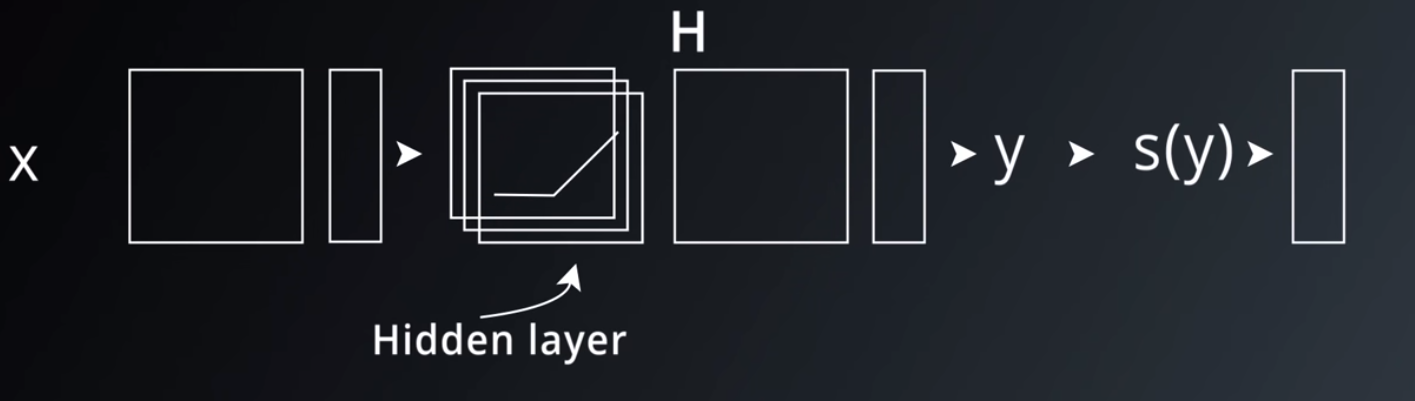


In [5]:
# Deep learning network - 2 layers

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 128  # Decrease batch size if you don't have enough memory
display_step = 1

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

n_hidden_layer = 256 # layer number of features

# Store layers weight & bias
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1])
x_flat = tf.reshape(x, [-1, n_input])
y = tf.placeholder("float", [None, n_classes])


# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
# Output layer with linear activation
logits = tf.matmul(layer_1, weights['out']) + biases['out']

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        # Display logs per epoch step
        if epoch % display_step == 0:
            valid_accuracy = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print('Epoch {:<3} - Validation Accuracy: {}'.format(epoch+1, valid_accuracy))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    # Decrease test_size if you don't have enough memory
    test_size = 256
    print("Accuracy:", accuracy.eval({x: mnist.test.images[:test_size], y: mnist.test.labels[:test_size]}))


Extracting .\train-images-idx3-ubyte.gz
Extracting .\train-labels-idx1-ubyte.gz
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz
Epoch 1   - Validation Accuracy: 42.2926025390625
Epoch 2   - Validation Accuracy: 28.536685943603516
Epoch 3   - Validation Accuracy: 20.163259506225586
Epoch 4   - Validation Accuracy: 18.118362426757812
Epoch 5   - Validation Accuracy: 13.374738693237305
Epoch 6   - Validation Accuracy: 10.978530883789062
Epoch 7   - Validation Accuracy: 10.91038703918457
Epoch 8   - Validation Accuracy: 13.454981803894043
Epoch 9   - Validation Accuracy: 10.902414321899414
Epoch 10  - Validation Accuracy: 9.910589218139648
Epoch 11  - Validation Accuracy: 7.735524654388428
Epoch 12  - Validation Accuracy: 8.960643768310547
Epoch 13  - Validation Accuracy: 9.350210189819336
Epoch 14  - Validation Accuracy: 9.886746406555176
Epoch 15  - Validation Accuracy: 8.259564399719238
Epoch 16  - Validation Accuracy: 5.81382417678833
Epoch 17  - Validatio